<a href="https://colab.research.google.com/github/simranvanjani/projects/blob/main/OCR_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (349 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install pdf2image 
!pip install easyocr 
!pip uninstall opencv-python-headless==4.5.5.62 
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 63.6 MB 62 kB/s 
     |████████████████████████████████| 47.7 MB 1.3 MB/s 
Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/p

In [ ]:
from pdf2image import convert_from_path 
import cv2
import easyocr
import numpy as np
from PIL import ImageDraw
import spacy

In [ ]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
!wget https://196034-584727-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2018/01/Jacky-Smith-Resume-Project-Manager.pdf

--2022-01-04 09:31:03--  https://196034-584727-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2018/01/Jacky-Smith-Resume-Project-Manager.pdf
Resolving 196034-584727-raikfcquaxqncofqfm.stackpathdns.com (196034-584727-raikfcquaxqncofqfm.stackpathdns.com)... 151.139.245.20
Connecting to 196034-584727-raikfcquaxqncofqfm.stackpathdns.com (196034-584727-raikfcquaxqncofqfm.stackpathdns.com)|151.139.245.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67598 (66K) [application/pdf]
Saving to: ‘Jacky-Smith-Resume-Project-Manager.pdf’

Jacky-Smith-Resume- 100%[===================>]  66.01K  --.-KB/s    in 0.001s  

2022-01-04 09:31:03 (74.8 MB/s) - ‘Jacky-Smith-Resume-Project-Manager.pdf’ saved [67598/67598]



In [ ]:
images = convert_from_path('Jacky-Smith-Resume-Project-Manager.pdf')

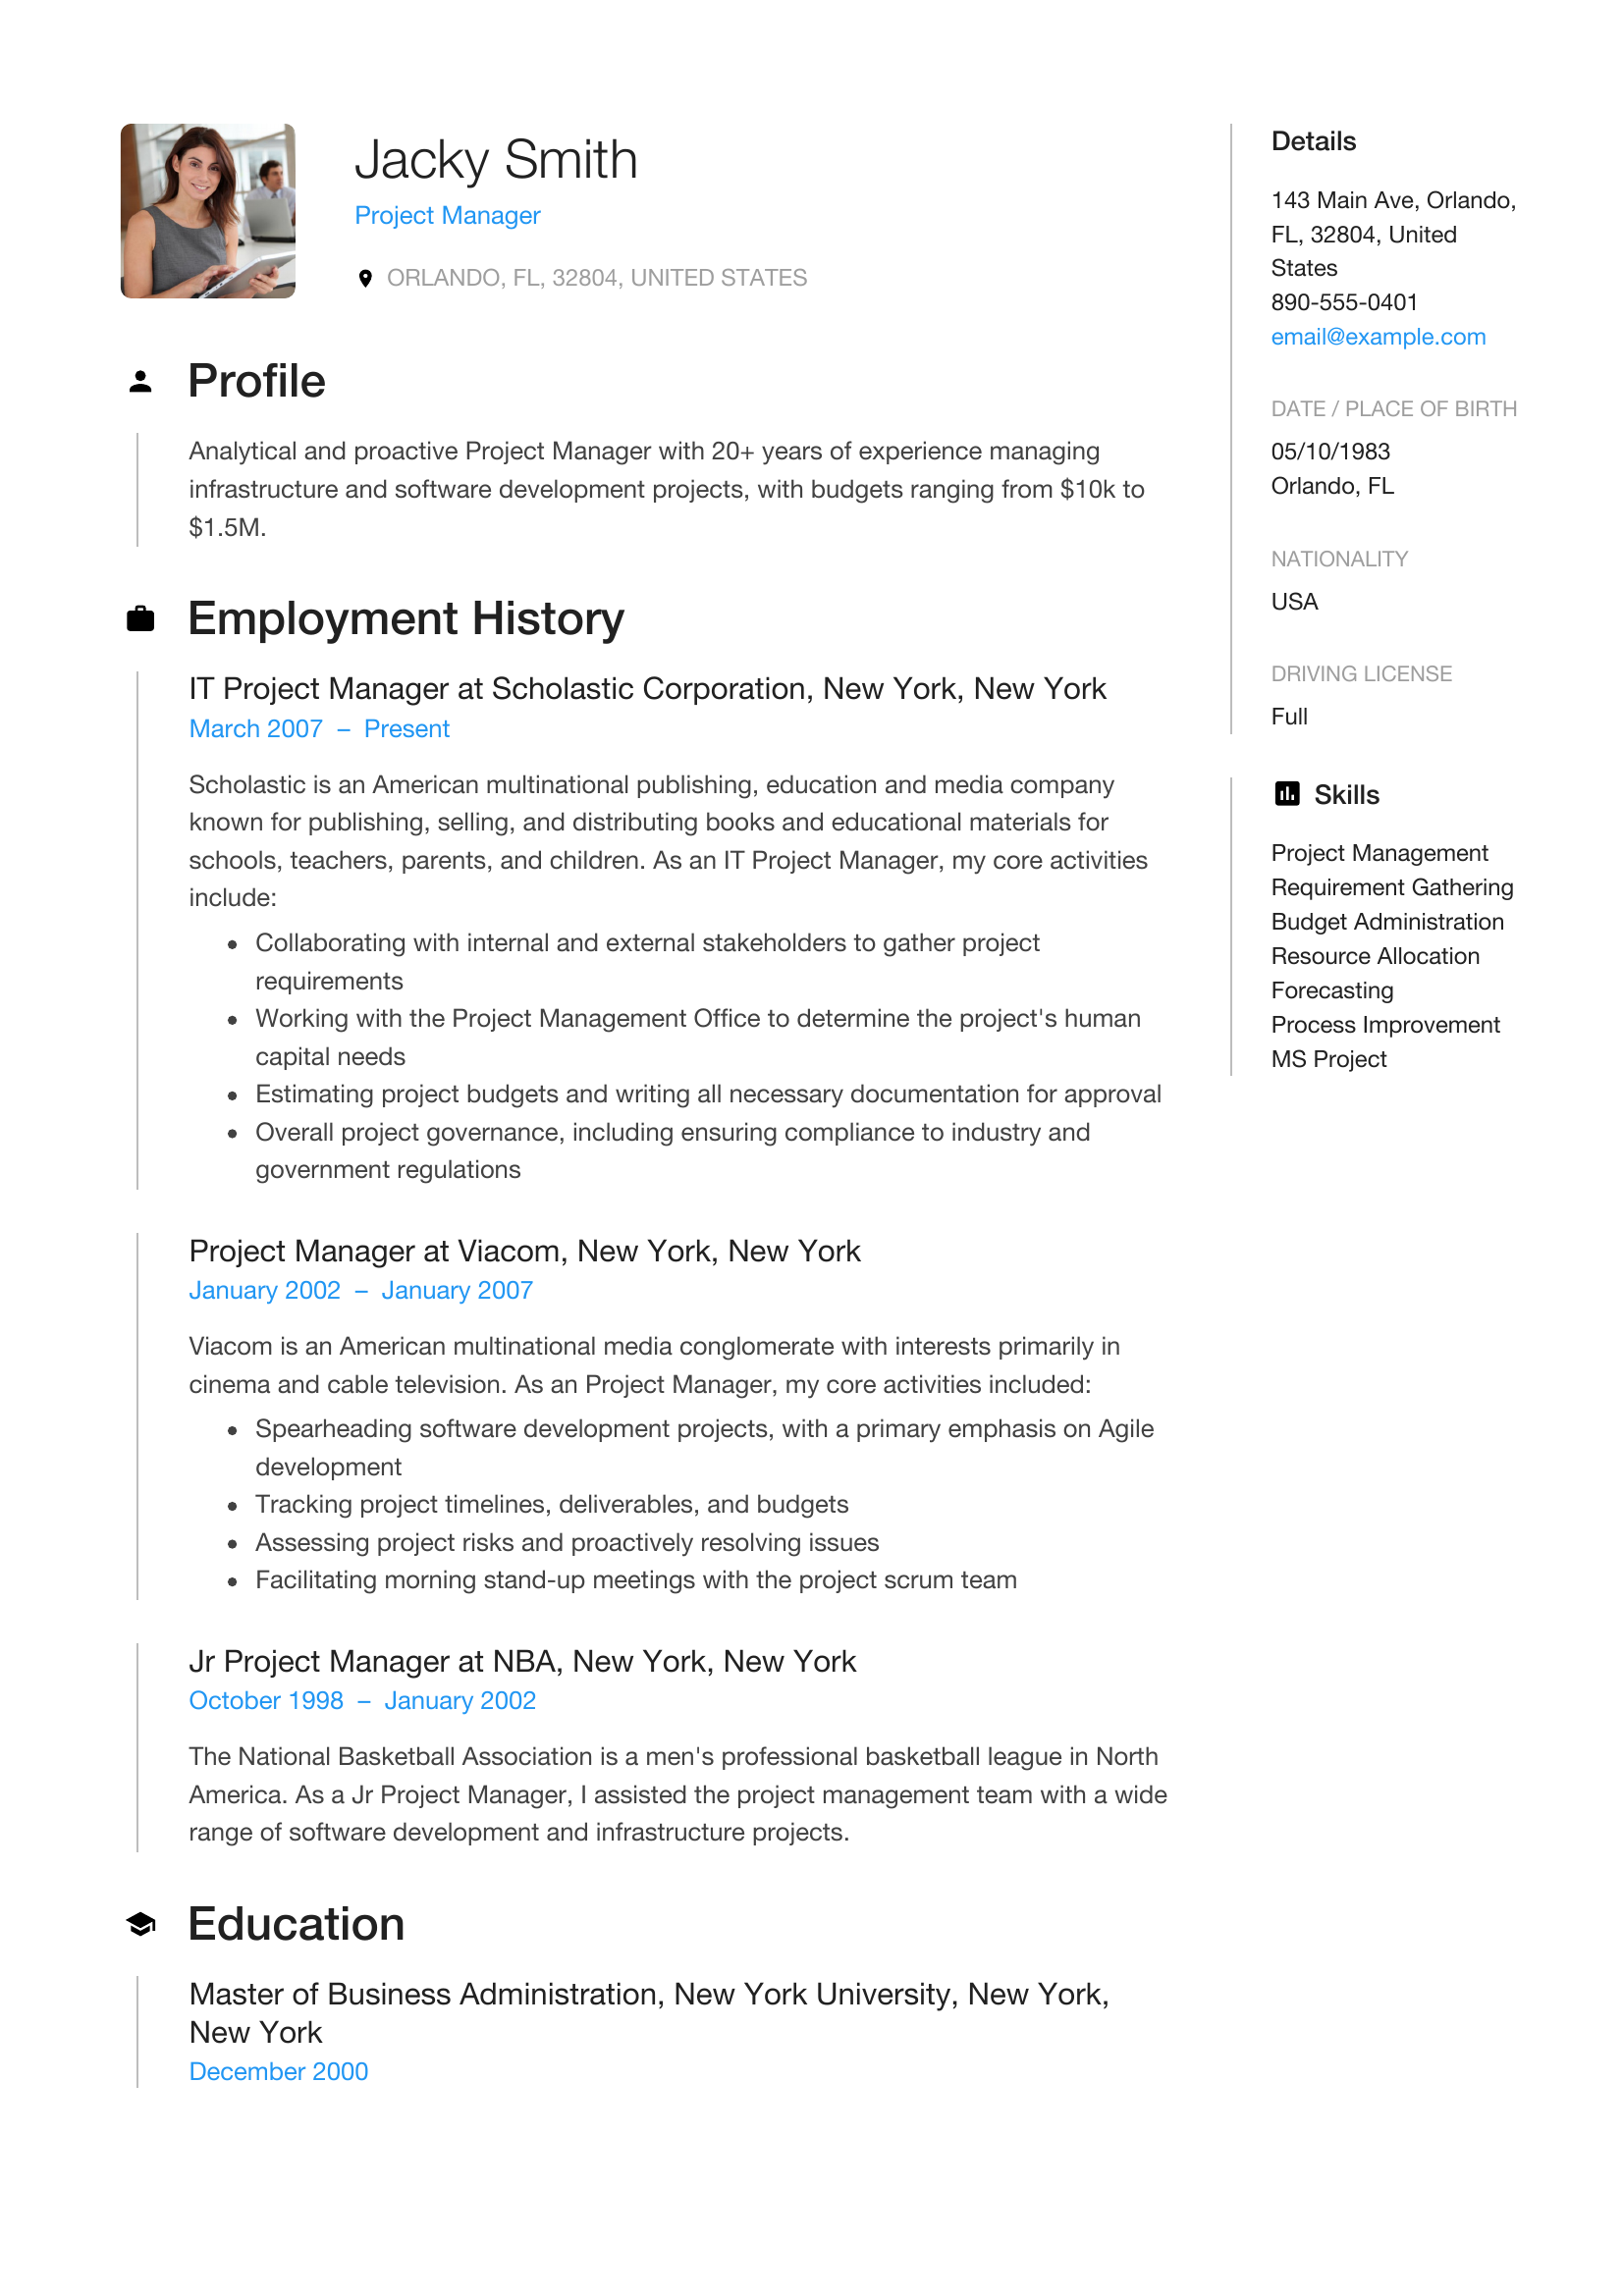

In [ ]:
from IPython.display import display, Image 
display(images[0])

In [ ]:
bounds = reader.readtext(np.array(images[0]), min_size = 0, slope_ths = 0.2, ycenter_ths = 0.7, height_ths = 0.6, width_ths =0.8, decoder = 'beamsearch', beamWidth = 10 )
bounds

[([[353, 133], [657, 133], [657, 199], [353, 199]],
  'Jacky Smith',
  0.9116586648941415),
 ([[1294, 128], [1386, 128], [1386, 160], [1294, 160]],
  'Details',
  0.9999589078562111),
 ([[1292, 189], [1548, 189], [1548, 218], [1292, 218]],
  '143 Main Ave, Orlando,',
  0.7586479835978516),
 ([[356, 202], [557, 202], [557, 240], [356, 240]],
  'Project Manager',
  0.9997477213210446),
 ([[1292, 222], [1486, 222], [1486, 254], [1292, 254]],
  'FL; 32804, United',
  0.8746720463734019),
 ([[392, 268], [828, 268], [828, 298], [392, 298]],
  'ORLANDO, FL, 32804, UNITED STATES',
  0.5536558736032884),
 ([[1292, 260], [1366, 260], [1366, 286], [1292, 286]],
  'States',
  0.9999942086245797),
 ([[1292, 294], [1446, 294], [1446, 320], [1292, 320]],
  '890-555-0401',
  0.9481356109011548),
 ([[1292, 330], [1516, 330], [1516, 360], [1292, 360]],
  'email@example.com',
  0.756161325017531),
 ([[188, 362], [338, 362], [338, 412], [188, 412]],
  'Profile',
  0.8471950855763887),
 ([[1292, 402], [154

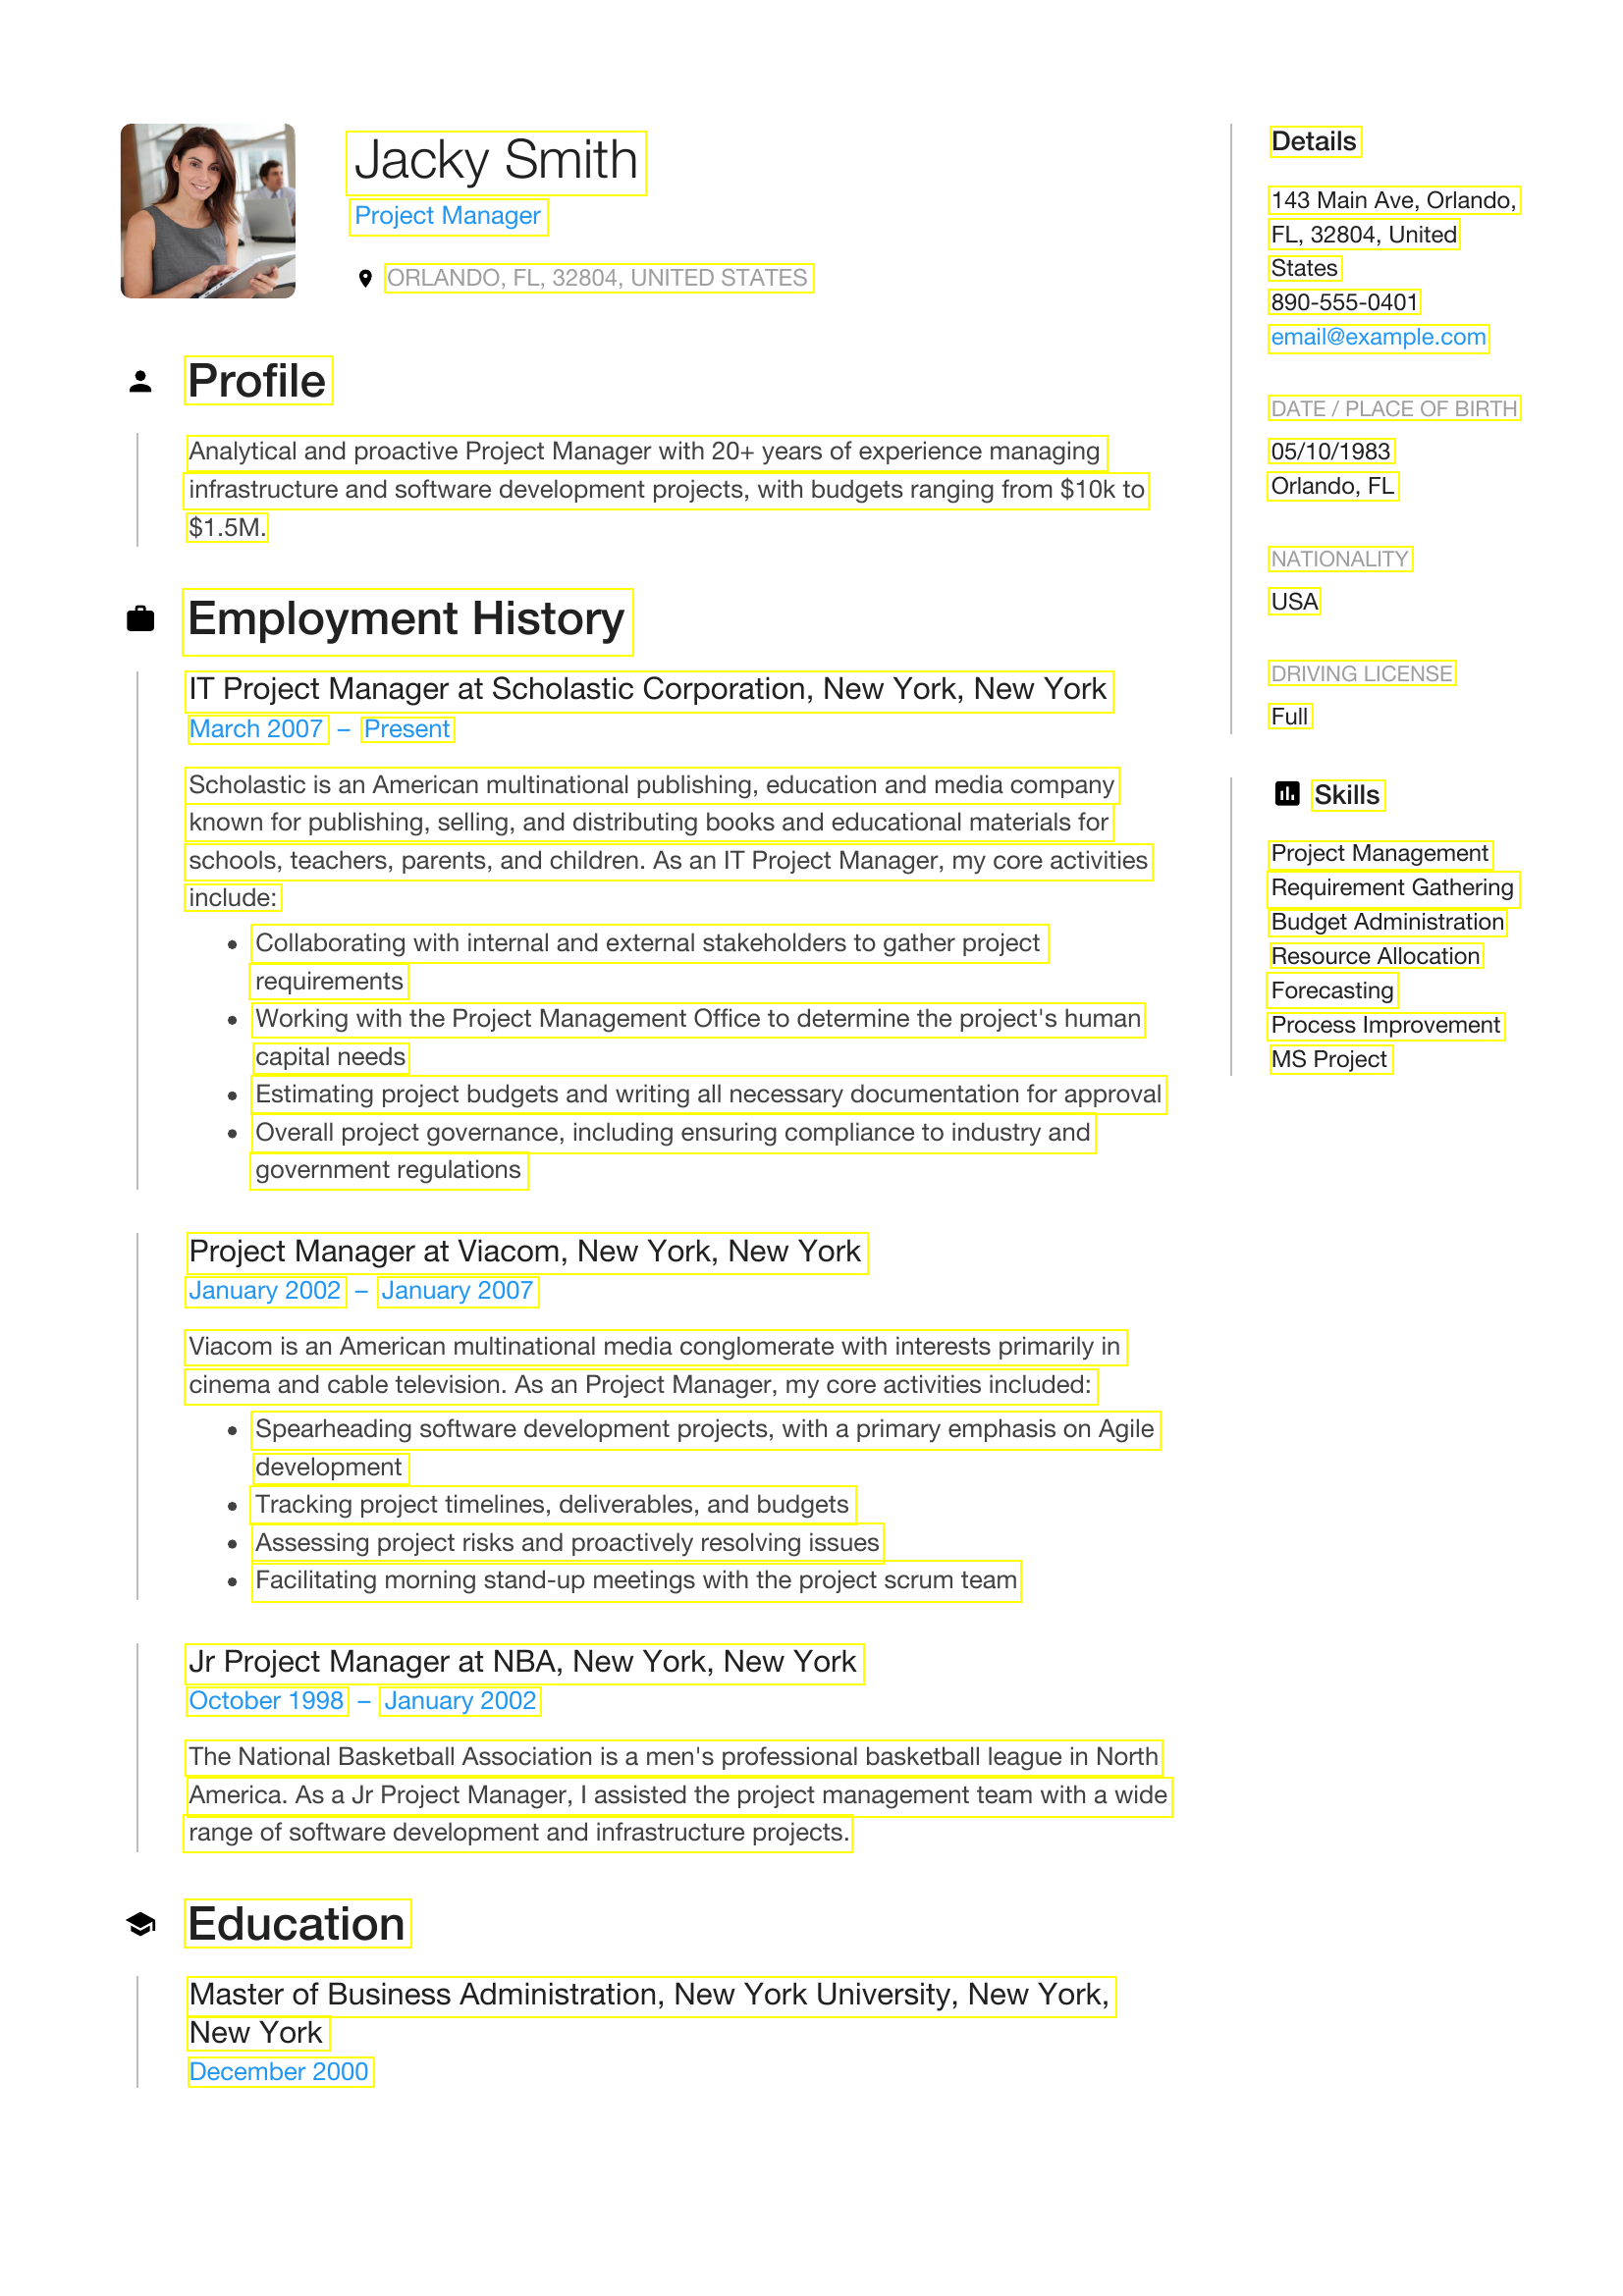

In [ ]:
def drawbox (image, bounds, color = 'yellow', width = 2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0 ,p1, p2, p3 = bound[0]
    draw.line([*p0 ,*p1, *p2, *p3, *p0], fill = color, width = width)
  return image

drawbox(images[0], bounds)

In [ ]:
bounds[1][1]

'Details'

In [ ]:
text = ''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'
print(text)

Jacky Smith
Details
143 Main Ave, Orlando,
Project Manager
FL; 32804, United
ORLANDO, FL, 32804, UNITED STATES
States
890-555-0401
email@example.com
Profile
DATE / PLACE OF BIRTH
Analytical and proactive Project Manager with 20+ years of experience managing
05/10/1983
infrastructure and software development projects, with budgets ranging from $1Ok to
Orlando, FL
S1.5M:
NATIONALITY
USA
Employment History
DRIVING LICENSE
IT Project Manager at Scholastic Corporation; New York; New York
March 2007
Present
Full
Scholastic is an American multinational publishing; education and media company
Skills
known for publishing; selling; and distributing books and educational materials for
schools, teachers, parents, and children: As an IT Project Manager, my core activities
Project Management
include:
Requirement Gathering
Budget Administration
Collaborating with internal and external stakeholders to gather project
Resource Allocation
requirements
Forecasting
Working with the Project Management Offic

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

In [ ]:
from spacy import displacy 

In [ ]:
displacy.render(nlp(doc.text), style = 'ent', jupyter = True )